### Setup

In [4]:
import os
from pathlib import Path
import seaborn as sns  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import missingno as msno

### Import Data

In [5]:
df = pd.read_csv("../../data/raw/triathlon_watch_training_data_final.csv")

### Data Structure

In [6]:
df.head()

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,...,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model
0,C0001,61.0,Other,UK,Birmingham,2.52,0.10,1.78,4.40,23.08,...,2329.95,2.0,1.0,2024-07-22,Fitness,Evening,Free,White,Yes,1.0
1,C0003,57.0,Other,Australia,Sydney,1.55,10.01,4.57,16.13,39.04,...,7904.93,2.0,1.0,2024-05-11,Fitness,Evening,Premium,Black,Yes,0.0
2,C0004,30.0,Other,India,Bangalore,1.19,12.04,8.64,21.87,71.59,...,10839.81,2.0,0.0,2024-08-16,Competition,Afternoon,Free,White,Yes,1.0
3,C0005,21.0,Male,Germany,Munich,2.25,4.67,0.92,7.84,49.09,...,NaN,3.0,0.0,2024-08-11,Recreation,Evening,Premium,Black,No,1.0
4,C0006,63.0,Male,India,Mumbai,0.80,5.88,0.67,7.35,13.91,...,3575.96,3.0,3.0,2024-11-18,Recreation,Morning,Basic,Black,Yes,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             978 non-null    object 
 1   Age of customer                978 non-null    float64
 2   Sex                            978 non-null    object 
 3   Ctry                           978 non-null    object 
 4   Town                           939 non-null    object 
 5   Swimming Hours per Week        978 non-null    float64
 6   Biking Hours per Week          954 non-null    float64
 7   Running Hours per Week         978 non-null    float64
 8   Total Training Hours per Week  978 non-null    float64
 9   VO2 Max                        975 non-null    float64
 10  10k Running Time Prediction    978 non-null    float64
 11  Calories Burned per Week       959 non-null    float64
 12  Support Cases of Customer      978 non-null    fl

### Data corrections

In [8]:
# Make sure column names are lower case and eliminate spaces
df.columns = df.columns.str.lower()
# Replace spaces with underscores
df.columns = df.columns.str.replace(r" ", r"_", regex=True)

Transition of the column "most_current_software_update" in a numeric datatype

In [9]:
df["most_current_software_update"] = pd.to_datetime(df["most_current_software_update"], format="%Y-%m-%d")
df["most_current_software_update"] = df["most_current_software_update"].max() - df["most_current_software_update"]
df["most_current_software_update"] = df["most_current_software_update"].dt.days


### Descriptive statistics

In [10]:
# Append all categorical and numeric columns to different lists
categorical = df.select_dtypes(include=['object']).columns.to_list()
numeric=df.select_dtypes(include=['float64']).columns.tolist()

### Exploring numerical data

In [11]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age_of_customer,978.0,40.53,14.07,-1.00,29.00,41.00,53.00,64.00
swimming_hours_per_week,978.0,2.23,1.60,0.00,1.02,2.02,3.19,9.97
biking_hours_per_week,954.0,5.53,3.50,0.00,2.77,5.11,7.87,16.11
running_hours_per_week,978.0,3.26,2.17,0.00,1.63,2.93,4.60,11.87
total_training_hours_per_week,978.0,11.45,8.04,0.15,7.38,10.22,14.10,100.00
vo2_max,975.0,51.37,21.46,10.22,42.07,53.40,60.10,247.26
10k_running_time_prediction,978.0,45.61,7.55,29.12,40.30,43.88,50.26,67.06
calories_burned_per_week,959.0,5487.53,2499.74,-47.26,3661.94,5168.41,7000.84,13280.06
support_cases_of_customer,978.0,1.96,1.41,0.00,1.00,2.00,3.00,4.00
customer_years,978.0,3.79,2.92,0.00,1.00,3.00,6.00,11.00


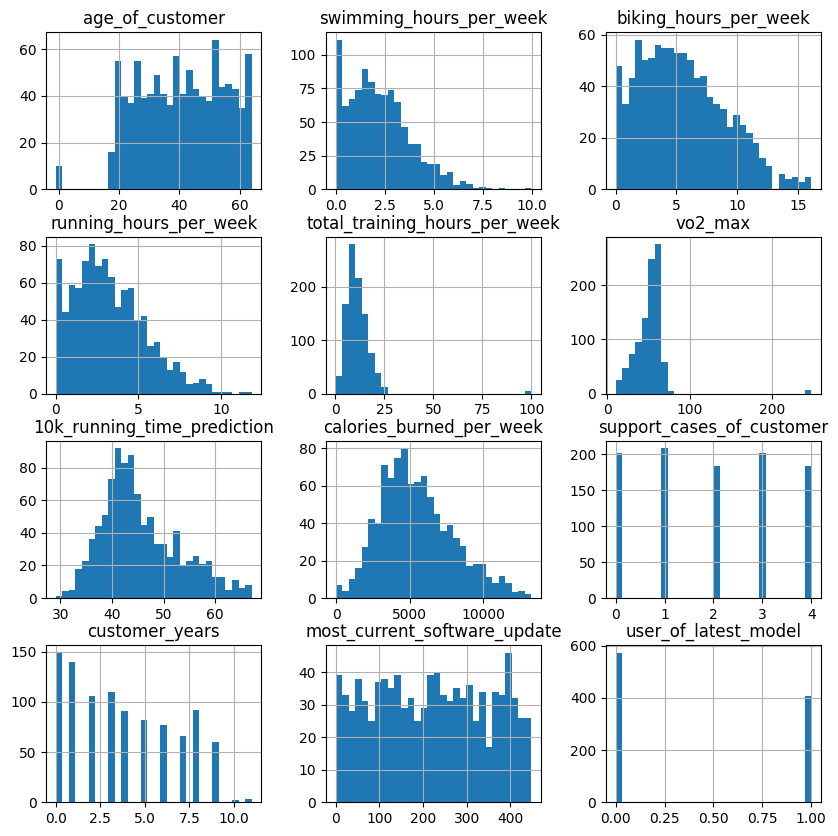

In [12]:
# Showing the distribution of the numerical data with histograms
%matplotlib inline
hist = df.hist(bins=30,figsize=(10, 10))

swimming_hours_per_week, biking_hours_per_week, running_hours_per_week, 10k_running_time_prediction, calories_burned_per_week, customer_years, most_current_software_update has to be tranformed in order to achieve more normal distribution.

In [13]:
# Showing the effect of the numerical data on the target variable
df[numeric].groupby(['user_of_latest_model']).mean().T.round(2)

user_of_latest_model,0.0,1.0
age_of_customer,44.91,34.33
swimming_hours_per_week,2.00,2.55
biking_hours_per_week,4.86,6.49
running_hours_per_week,2.91,3.75
total_training_hours_per_week,9.93,13.59
vo2_max,46.72,57.43
10k_running_time_prediction,47.97,42.28
calories_burned_per_week,4913.48,6307.20
support_cases_of_customer,1.81,2.17
customer_years,4.12,3.32


<Axes: >

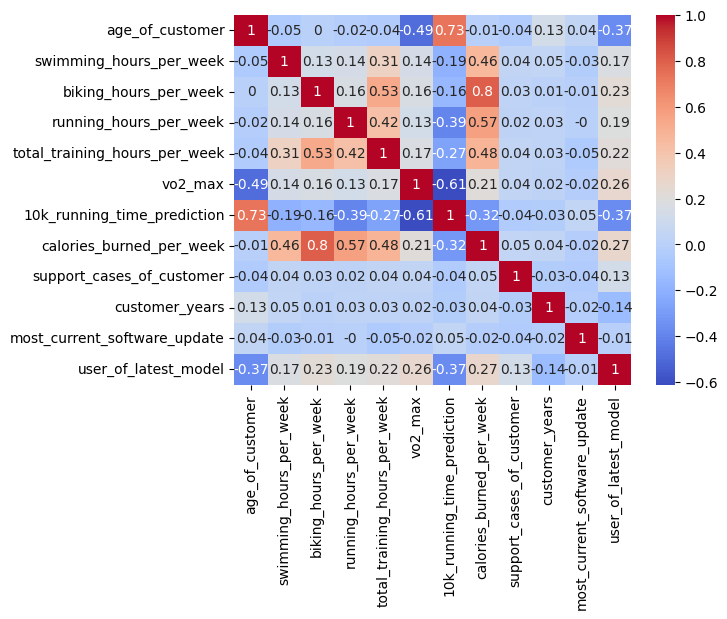

In [14]:
# showing the correlation between the numerical data
corr = df[numeric].corr().round(2)
sns.heatmap(corr, cmap="coolwarm", annot=True)

Highest correlation show age_of_customer and 10k_running_time_prediction.

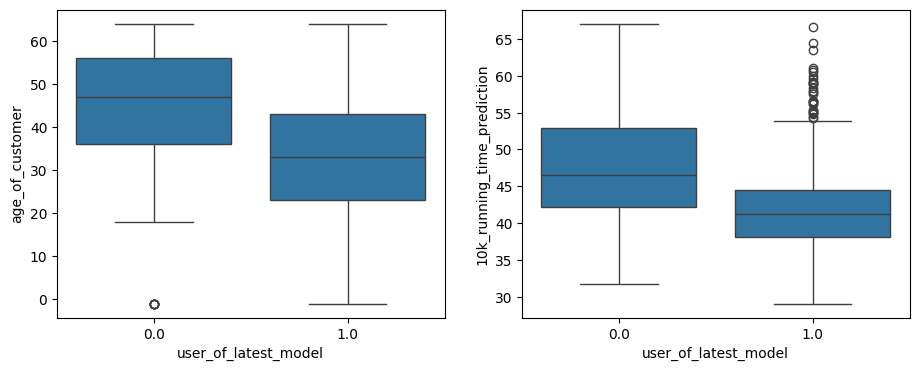

In [15]:
# Showing the effect of two higly correlated variables on the target variable
fig, axes = plt.subplots(1, 2, figsize=(11, 4))  
sns.boxplot(data=df, x='user_of_latest_model', y='age_of_customer', ax=axes[0])
sns.boxplot(data=df, x='user_of_latest_model', y='10k_running_time_prediction', ax=axes[1])
plt.show()

The most relevant predictors on the response variable seem to have some outlier, which have to be handled in the data preparation.

### Exploring categorical data

In [16]:
# Getting an overview of the categorical data
df[categorical].describe().T

,count,unique,top,freq
id,978,971,C0942,2
sex,978,3,Male,345
ctry,978,7,Australia,200
town,939,15,Berlin,76
goal_of_training,950,3,Fitness,332
preferred_training_daytime,954,3,Morning,334
subscription_type,977,3,Free,341
color_of_watch,946,2,Black,691
synchronisation,950,2,Yes,840


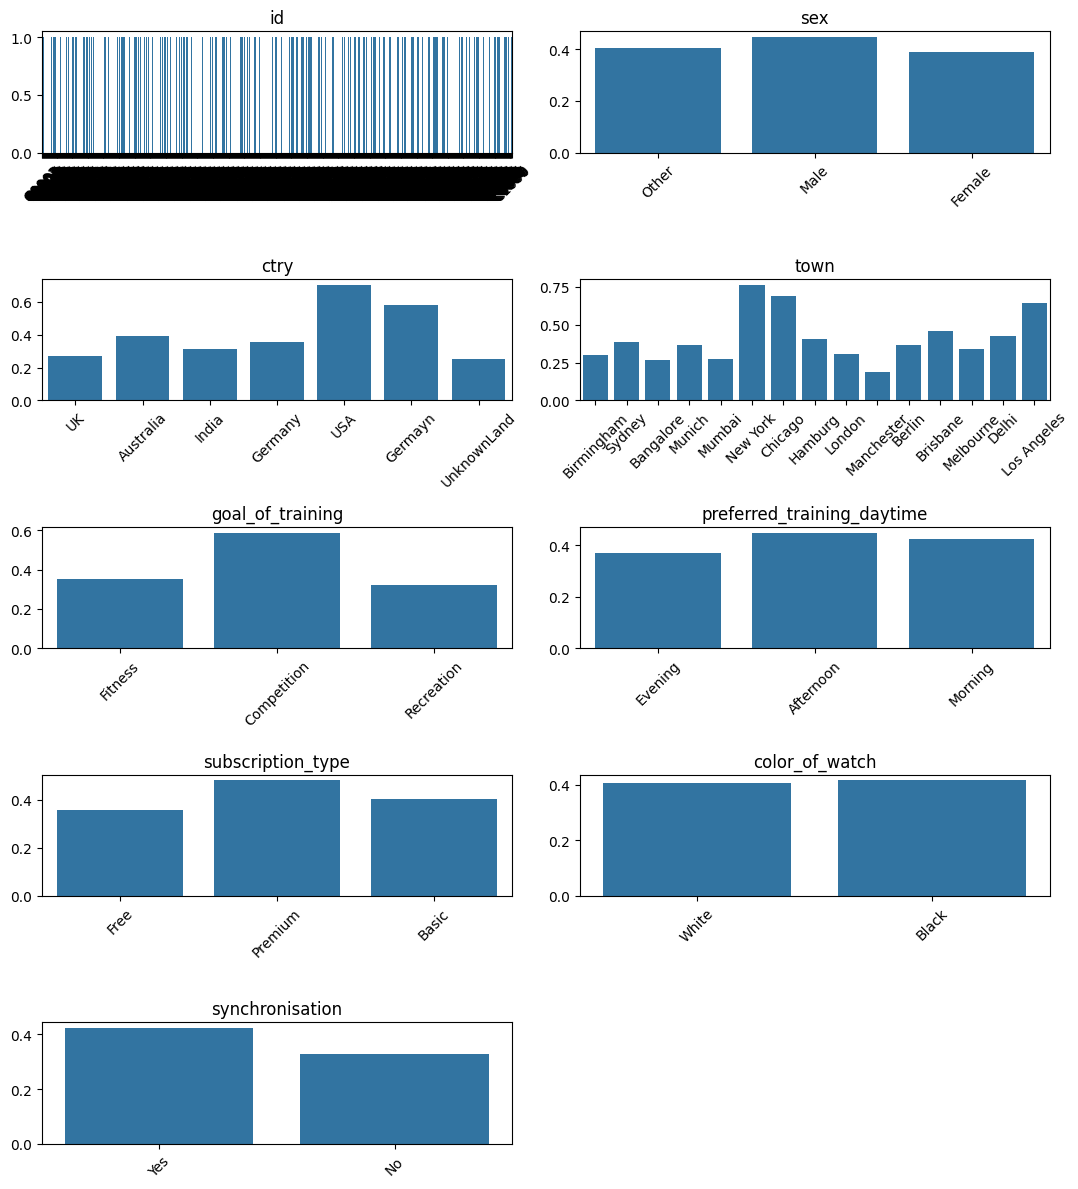

In [17]:
# Vilualizing the effect of the categorical data on the target variable
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(11, 12))  
axes = axes.flat  

# Draw a barplot for each categorical column
for ax, col in zip(axes, categorical):
    sns.barplot(data=df, x=col, y='user_of_latest_model', ax=ax, errorbar=None)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis="x", rotation=45)

# Hide the last plot
for ax in axes[len(categorical):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

color_of_watch seem to have no impact on the response variable. There are inconsistent data in the attribute ctry. The values "Germany" and "Germanyn" probably stand for the same city. In the prerocessing steps a correction of the value Germanyn will be testing.

### Missing values

In [18]:
df[categorical].isnull().sum()

id                            22
sex                           22
ctry                          22
town                          61
goal_of_training              50
preferred_training_daytime    46
subscription_type             23
color_of_watch                54
synchronisation               50
dtype: int64

<Axes: >

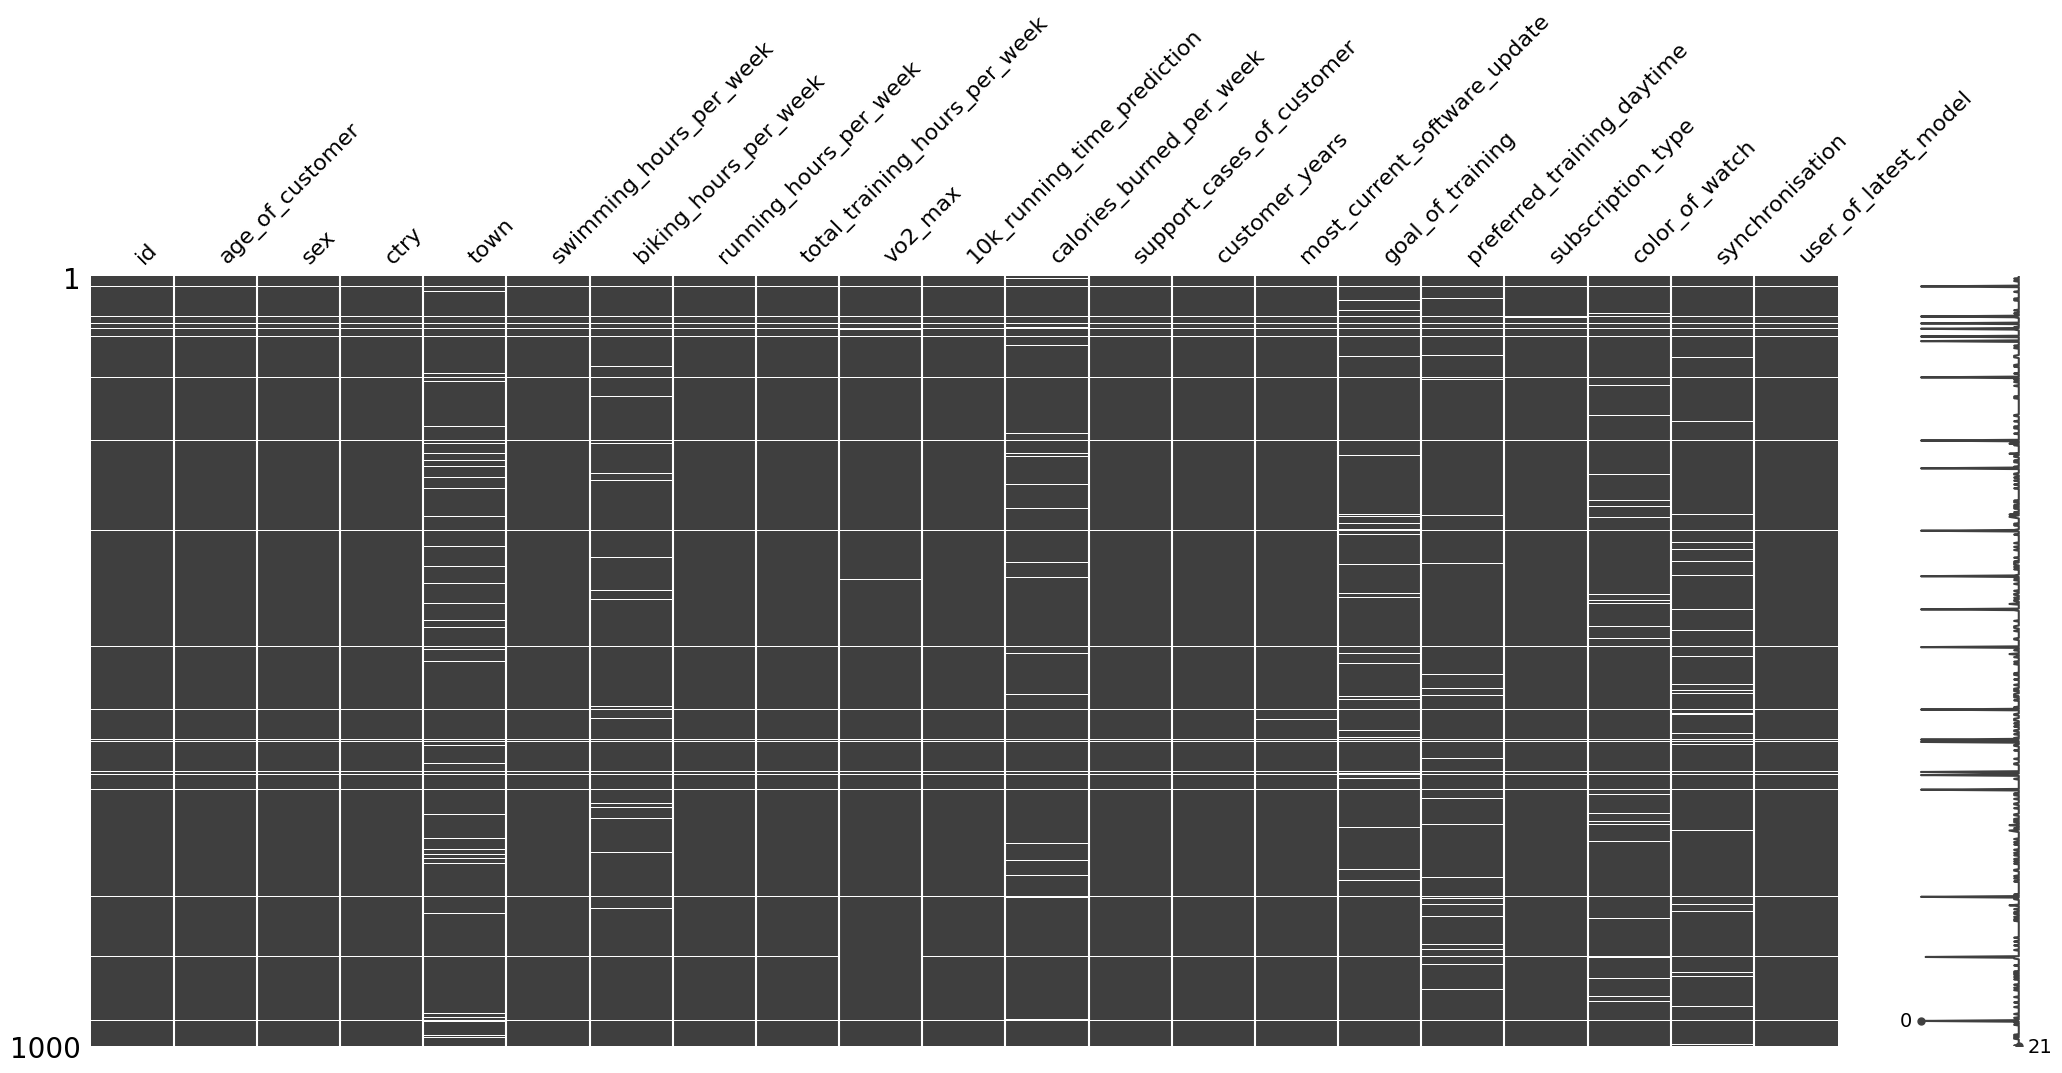

In [19]:
# Show all the missing values in the dataset
msno.matrix(df)

A lot of rows with no label and several empty values can be removed in the data preparation. 

### Duplicates

In [20]:
# Show all duplicate rows in the dataset
duplikate = df[df.duplicated(keep=False)]
duplikate

,id,age_of_customer,sex,ctry,town,swimming_hours_per_week,biking_hours_per_week,running_hours_per_week,total_training_hours_per_week,vo2_max,...,calories_burned_per_week,support_cases_of_customer,customer_years,most_current_software_update,goal_of_training,preferred_training_daytime,subscription_type,color_of_watch,synchronisation,user_of_latest_model
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are some duplikate in the dataframe, which have to be removed in the data preparation. .